## 可視化(Qiita記事参照)
数値データを手っ取り早く可視化するなら、現状**PlotsかMakie**の二択が有力

今回はPlotsを使用する。特徴としては、**複数のバックエンドを、ほぼ単一の記述で扱うことができる**点がある。

様々な特徴の可視化パッケージを、それぞれ個別に関数・記法を覚えていては無駄が多いので、フロントエンドとしてPlotsで仕様を吸収し、それらの使用を気にすることなくバックエンドを扱うことができる。

### バックエンド
扱える可視化パッケージ

・GR→デフォルト・軽い

・Plotly/PlotlyJS→綺麗・インタラクティブ(ブラウザ表示)

・PyPlot→綺麗・インタラクティブ、PyCallを使ったMatplotlib

・PGFPlotsX→Texによるグラフ生成(ただし、pkg以外に必要条件が複数あるので面倒)

・InspecterDR→REPL上でCUI表示、そりゃ軽い

・HDF5→表示ではなく「.hdf5」形式で可視化データをファイル操作する

普段用ならGR, 見た目綺麗でPyPlot, 3Dでぐりぐり動かしたいならPlotly

準備は、add Plotsで良い(さらにGRを除く他のバックエンドが必要なら、PyPlotなど)

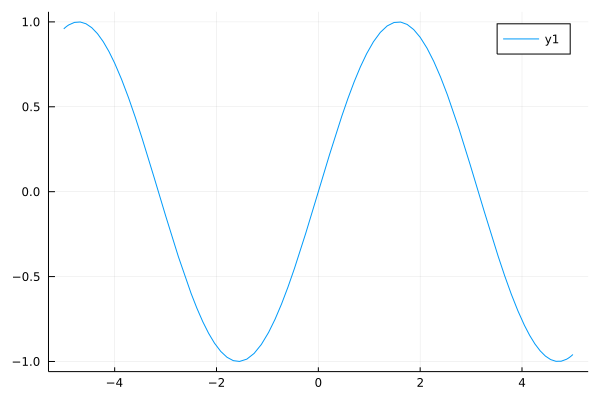

In [4]:
using Plots
gr() # バックエンドの指定・切替(デフォルトはGRなので、なくても良い)
plot(sin) # sin関数をプロット。plot(関数;初期値,終了値)で初期値・終了値を省略

#関数cosを追加。　plot!((ベースのプロット,) 追加関数,...)　,ベース関数の省略時は直前のプロット

current()で直前のプロットを拾うこともできる

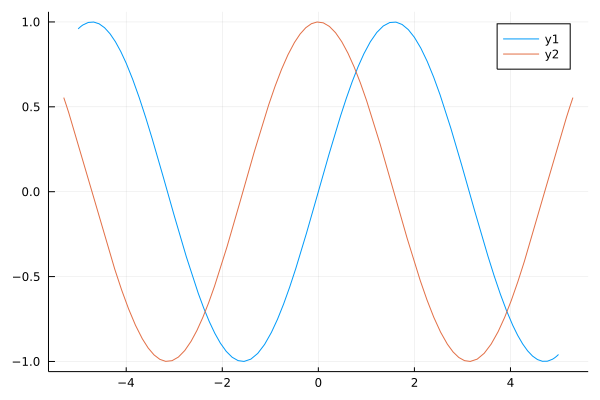

In [5]:
plot(sin)
plot!(cos)

プロット調整のごく一部ですが、さらにAlias等も沢山ある。

http://docs.juliaplots.org/latest/attributes/

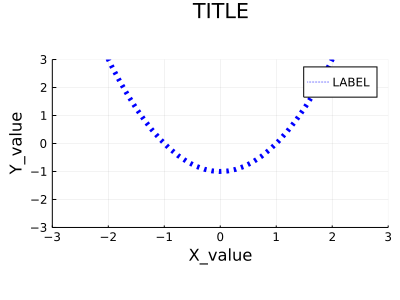

In [6]:
plot(x->(x^2-1),               #無名関数による x²-1
    xlabel       ="X_value",   #X軸のラベル
    ylabel       ="Y_value",   #Y軸のラベル
    label        ="LABEL",     #凡例のテキスト
    xlims        =(-3,3),      #X軸の範囲
    ylims        =(-3,3),      #Y軸の範囲
    aspect_ratio =0.5,         #表示のY/Xのアスペクト比
    title        ="TITLE",     #タイトル
    linecolor    =:blue,       #線の色
    linewidth    =5,           #線幅
    linestyle    =:dot,        #線種
    size         =(400,300),   #プロットのサイズ
)

### グラフの種類

docsによると
:none,:line,:path,:steppre,:steppost,:sticks,:scatter,:heatmap,:hexbin,:barbins,:barhist,:histogram,:scatterbins,
:scatterhist,:stepbins,:stephist,:bins2d,:histogram2d,:histogram3d,:density,:bar,:hline,:vline,:contour,:pie,
:shape,:image,:path3d,:scatter3d,:surface,:wireframe,:contour3d,:volume
と種類があるようです。

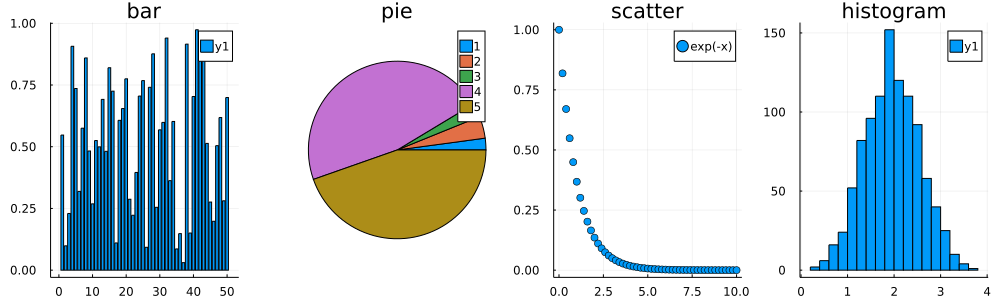

In [7]:
#plot(データ配列,st=:グラフの種類,...) stはseriestypeのAlias
p1=plot(rand(50),st=:bar,title="bar")                           #棒グラフ
p2=plot(rand(5),st=:pie,title="pie")                            #円グラフ
x=0:0.2:10
p3=plot(x,exp.(-x),st=:scatter,title="scatter",label="exp(-x)") #散布図 plot(xデータ,yデータ,st=...)
p4=plot(rand(1000)+rand(1000)+rand(1000)+rand(1000),
        st=:histogram,title="histogram")                        #ヒストグラム(4回乱数を足したデータを自動処理)
plot(p1,p2,p3,p4,layout=(1,4),size=(1000,300))                  #上記プロットを一気に1×4レイアウトでプロット

この辺りのいくつかはst=で指定しなくても、そのままの関数が用意されており

In [9]:
#データ作成
x=-3:0.2:3
y=x
z=@. exp(-(x^2+y'^2))                                    #z=exp(-(x²+y²)) , yの[']転置と@.マクロに注意
#各プロット
p1=heatmap(z,title="heatmap")                            #ヒートマップ heatmap(2次元データ,...)
p2=contour(x,y,z,title="contour")                        #コンター図   contour(xデータ,y,z,...)
p3=wireframe(x,y,z,title="wireframe")                    #3Dのワイヤーフレーム表記
p4=surface(x,y,z,title="surface")                        #3Dの曲面表示
plot(p1,p2,p3,p4,layout=(1,4),size=(1500,250),fmt=:png)  #1×4表記 (少し重たくなるので、後述のフォーマットpng)

LoadError: invalid redefinition of constant z

#### pngとsvg



先ほどのplotでfmt=:png を指定しましたが、デフォルでは:svg形式で出力されます。:pngは画像形式ですが、:svgは座標等の描画情報を持っており、wireframeプロット等したとき、Jupyterではブラウザが頑張って線を引き、動作が重たくなってしまう場合があります。

大概の例で:svgの方が表示はキレイなのですが、PyPlotバックエンドのheatmapで変な線が引かれてしまうので、使い分けるとよい

In [1]:
using Plots
#plot(データ配列,c=:カラースキームの種類,...) colorはseriescolorのAlias（他にc等)
x=y=range(-10,10,length=51)
r(x,y)=sqrt(x^2+y^2+0.0)+1e-10
z(x,y)=sin(r(x,y))/r(x,y)

p1=surface(x,y,z.(x,y'),color=palette(:ice    ,10) ,title="palette(:ice,10)")     #パレットに:ice指定(2番目の引数は分割数)
p2=surface(x,y,z.(x,y'),color=palette(:thermal,10) ,title="palette(:thermal,10)") #パレットに:thermal指定
p3=surface(x,y,z.(x,y'),color=cgrad(:thermal)      ,title="cgrad(:thermal)")      #グラデーションで:thermal指定
p4=surface(x,y,z.(x,y'),color=:thermal             ,title=":thermal")             #省略表記は上記グラデーション

plot(p1,p2,p3,p4,layout=(2,2),size=(1500,600))

MethodError: MethodError: no method matching iterate(::RGBA{Float64})
Closest candidates are:
  iterate(!Matched::Pkg.Resolve.NodePerm, !Matched::Any...) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Pkg/src/Resolve/maxsum.jl:228
  iterate(!Matched::Test.GenericString) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Test/src/Test.jl:1589
  iterate(!Matched::Test.GenericString, !Matched::Integer) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Test/src/Test.jl:1589
  ...

In [10]:
palette([:red,:white,:purple],15 ,rev=true) |>display   # rev=trueは反転
cgrad([RGB(255/255,0,0),:lightgreen])       |>display   # RGB関数は各色0～1範囲

In [ ]:
anim = @animate for i in 0:0.1:2　　　　　　　　　　　　#@animateマクロでfor文内ループ毎をフレームとしたpngファイル生成
    x=0:0.1:2
    y1=@. sin(pi*(x+i))
    y2=@. cos(pi*(x+i))
    plot(x,y1,label="sin(π(x+$i))",size=(250,250))   #ラベルのテキストに$(変数)を使う事でラベル表示も変化
    plot!(x,y2,label="cos(π(x+$i))")                 #最後のプロットがpngとして格納される
end                                                  #endの後にever 5 等とすると5フレーム毎に残す
gif(anim,fps=30,"sin_cos.gif")                       #gif出力,fpsとファイル名指定はオプション(tmp.gifがデフォ)

gif()以外にも他にもmp4(),mov(),webm()あるようです。

動画生成は長めに作ると完成まで時間がかかり、確認が遅くなるのですがJupyter notebookでの動画に限り
・JuliaのJupyterでプロット動画を素早く確認する#折衷案
を利用すると、各フレームをプロット出力しながらの確認にすることができます。